<a href="https://colab.research.google.com/github/saransh2396/NETFLIX-MOVIES-AND-TVSHOWS-CLUSTERING/blob/main/28_Dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
!nvidia-smi

Tue Dec 28 15:53:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING - Saransh Srivastava/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# Handling Null Values

In [ ]:
(df.isnull().sum()/len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
df['cast'].fillna(value='Not Mentioned',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
df.drop(['director'],axis=1,inplace=True)

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
(df.isnull().sum()/len(df))*100

show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [ ]:
df.shape

(7770, 11)

In [ ]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Data Manipulation

In [ ]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [ ]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added'].head()

0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
# type should be a catego
df['type'] = pd.Categorical(df['type'])

# target_ages is another category (4 classes)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
df['year_added'] = pd.to_numeric(df['year_added'])
df['date_added']=pd.to_datetime(df["date_added"].str.strip(), format="%B %d, %Y")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   category      
 2   title         7770 non-null   object        
 3   cast          7770 non-null   object        
 4   country       7770 non-null   object        
 5   date_added    7770 non-null   datetime64[ns]
 6   release_year  7770 non-null   int64         
 7   rating        7770 non-null   object        
 8   duration      7770 non-null   object        
 9   listed_in     7770 non-null   object        
 10  description   7770 non-null   object        
 11  year_added    7770 non-null   int64         
 12  month_added   7770 non-null   object        
 13  target_ages   7770 non-null   category      
dtypes: category(2), datetime64[ns](1), int64(2), object(9)
memory usage: 804.6+ KB


In [ ]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens


# EDA

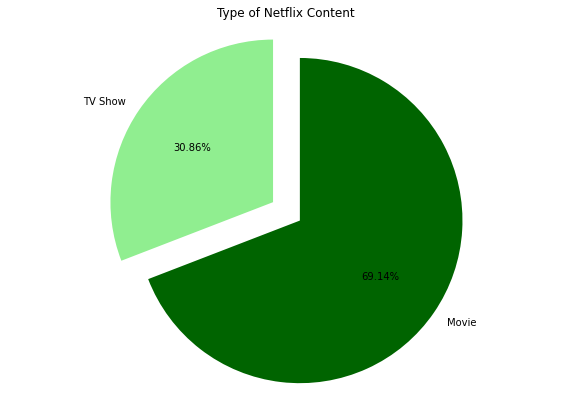

In [ ]:
plt.figure(figsize=(10, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,autopct='%1.2f%%',explode=[0.1,0.1],
        colors=['lightgreen','darkgreen'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

**No. of movies content is more than double than Tv show content**

In [ ]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

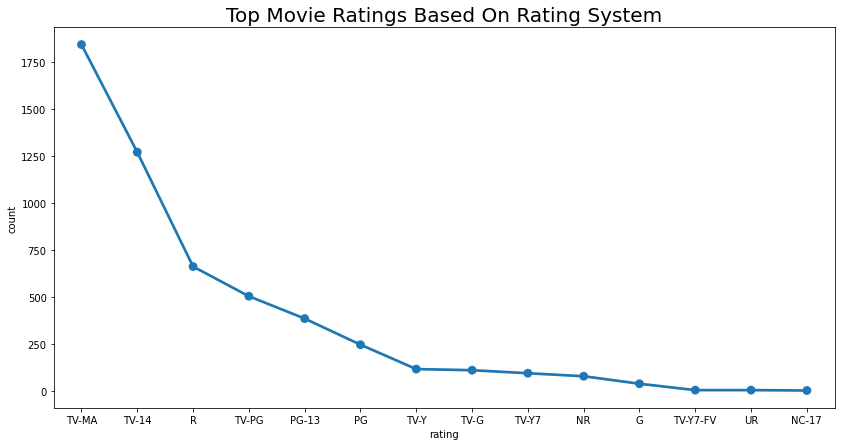

In [ ]:
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

**Most number of movies rated TV-MA i.e. Adult Rating**

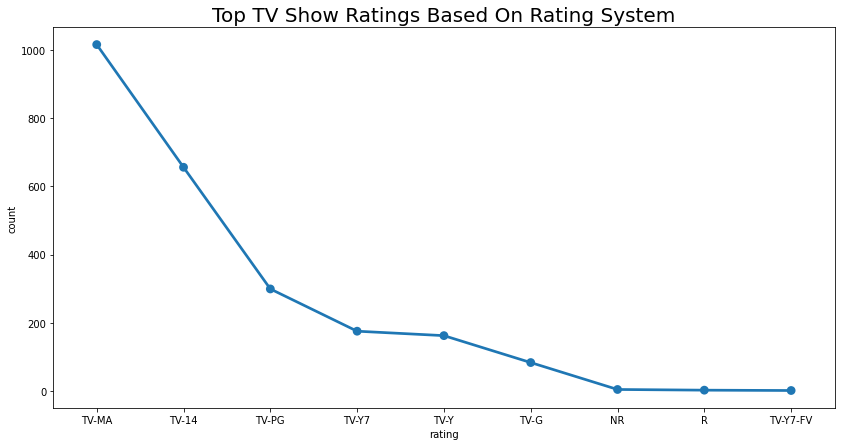

In [ ]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

**Most number of TV Shows rated TV-MA i.e. Adult Rating**

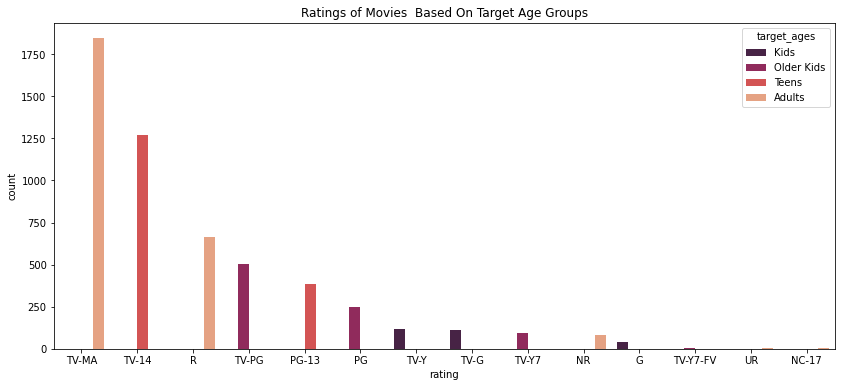

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Ratings of Movies  Based On Target Age Groups')
sns.countplot(x=df_movies['rating'],hue=df_movies['target_ages'],data=df_movies,order=df_movies['rating'].value_counts().index,palette="rocket")

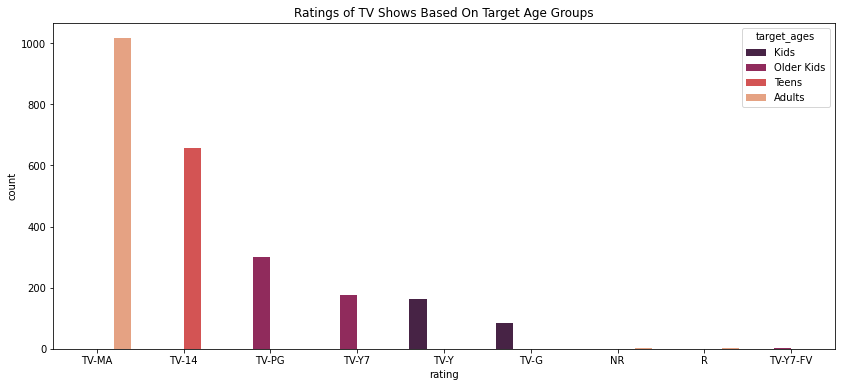

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Ratings of TV Shows Based On Target Age Groups')
sns.countplot(x=df_tv['rating'],hue=df_tv['target_ages'],data=df_tv,order=df_tv['rating'].value_counts().index,palette="rocket")

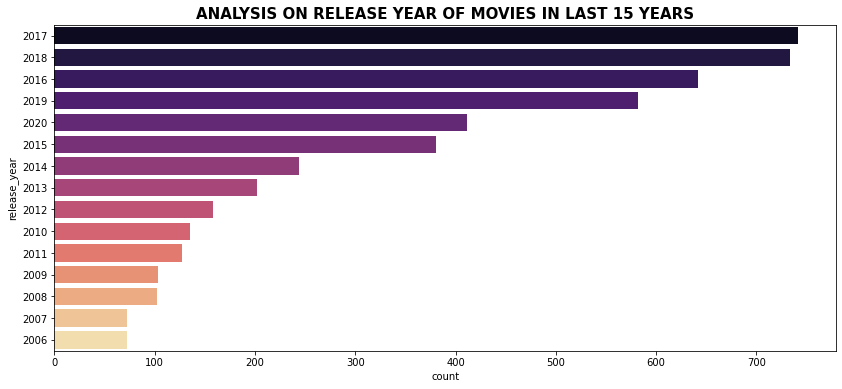

In [ ]:
plt.figure(figsize=(14,6))
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES IN LAST 15 YEARS', fontsize=15, fontweight='bold')
sns.countplot(y=df_movies['release_year'],data=df_movies,order=df_movies['release_year'].value_counts().index[0:15],palette="magma")

*2017 has the highest number of movies released*

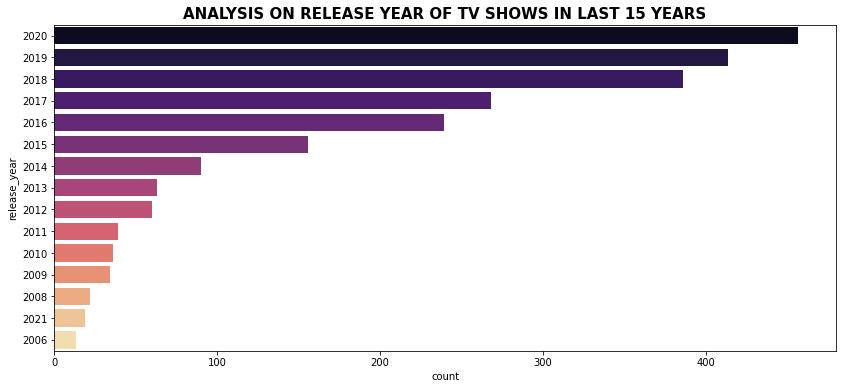

In [ ]:
plt.figure(figsize=(14,6))
plt.title('ANALYSIS ON RELEASE YEAR OF TV SHOWS IN LAST 15 YEARS', fontsize=15, fontweight='bold')
sns.countplot(y=df_tv['release_year'],data=df_tv,order=df_tv['release_year'].value_counts().index[0:15],palette="magma")

*2020 has the highest number of TV Shows released.*

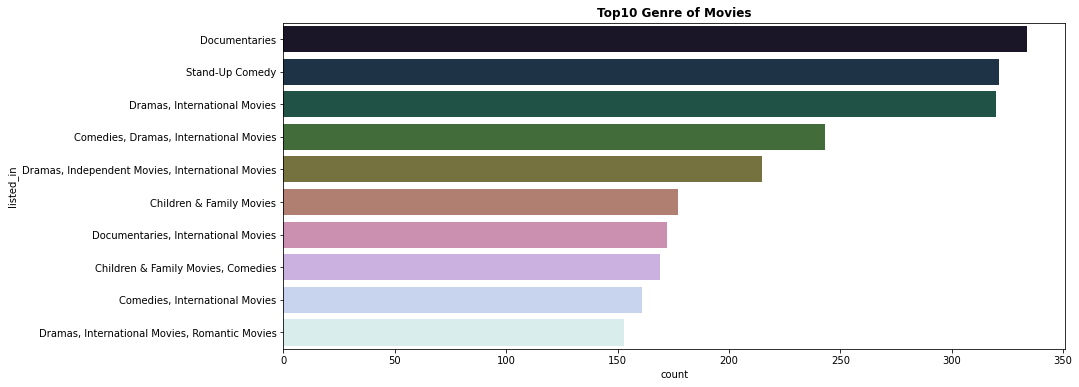

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=df_movies['listed_in'],data=df_movies,order=df_movies['listed_in'].value_counts().index[0:10],palette="cubehelix")

**There are so many documentaries to watch on NETFLIX**

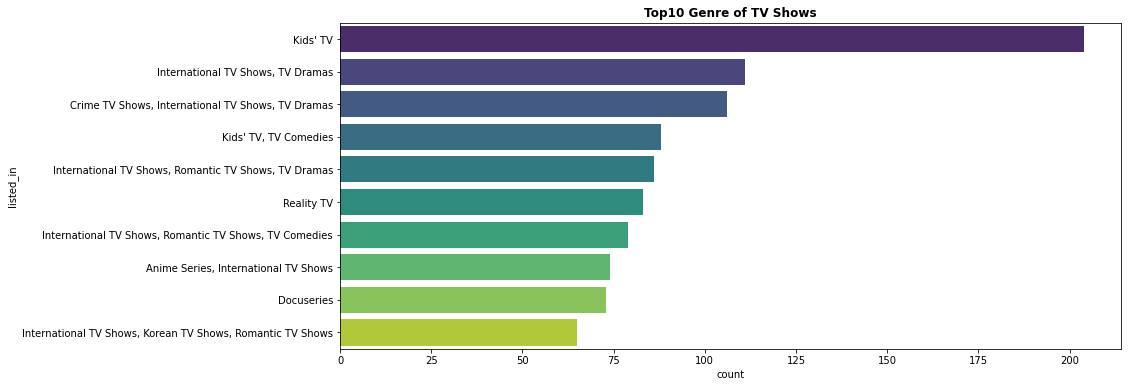

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=df_tv['listed_in'],data=df_tv,order=df_tv['listed_in'].value_counts().index[0:10],palette="viridis")

**There are so many Kids TV Shows to watch on NETFLIX**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


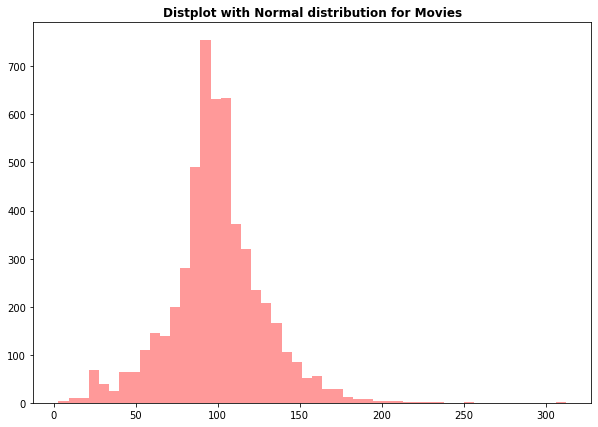

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

**Mainly the movie duration is in b/w 55 to 150 minutes**

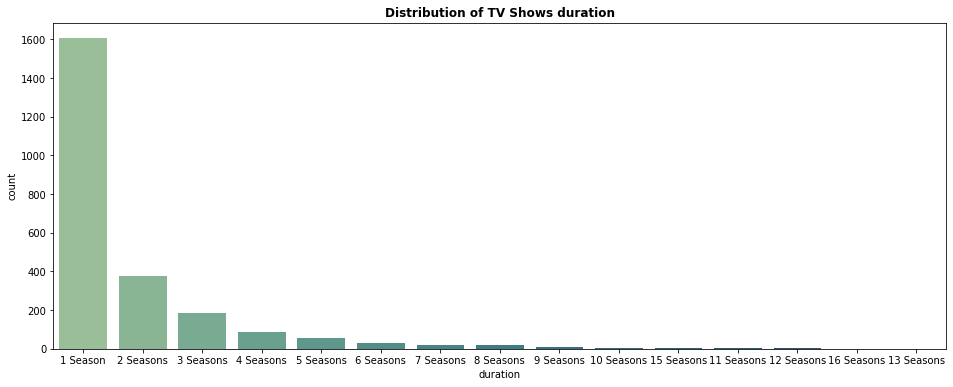

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=df_tv['duration'],data=df_tv,order = df_tv['duration'].value_counts().index,palette="crest")

**Mostly every TV Shows has atleast 3 seasons**

# Understanding what type content is available in different countries

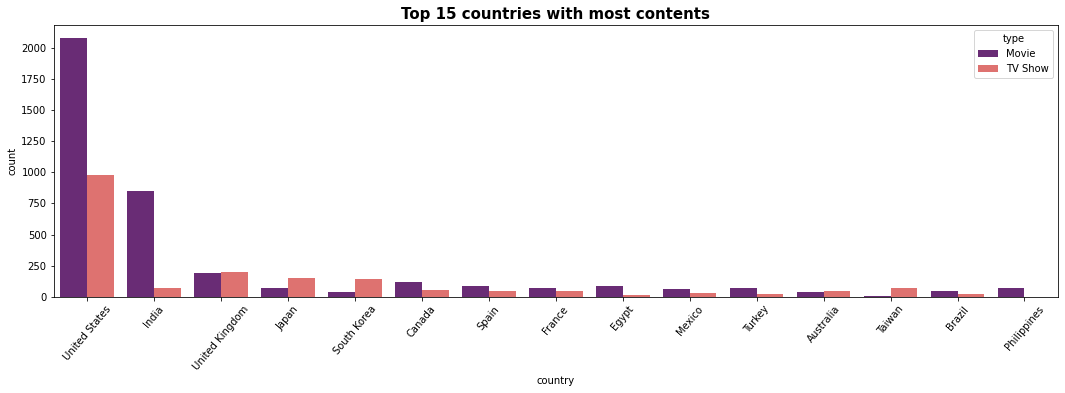

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],palette="magma",order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

Movies are more available in different countries than TV SHOWS

# Is Netflix has increasingly focusing on TV rather than movies in recent years.

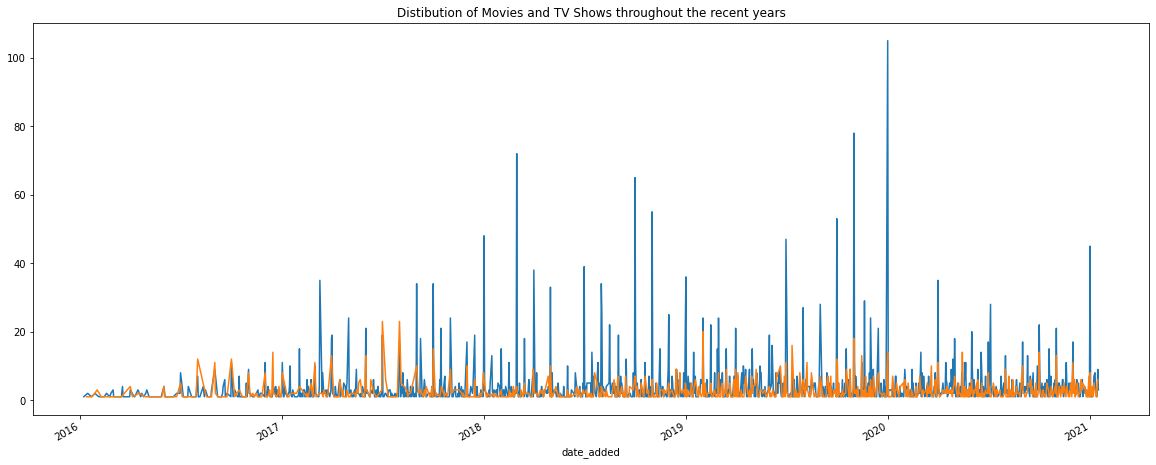

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Distibution of Movies and TV Shows throughout the recent years')
df_movies[df_movies["date_added"] > pd.Timestamp(2016, 1, 1)].groupby("date_added").size().plot(kind="line")
df_tv[df_tv["date_added"] > pd.Timestamp(2016, 1, 1)].groupby("date_added").size().plot(kind="line")
plt.show()

The growth in number of movies on netflix is much higher than that of TV shows

In [ ]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens


# Feature Engineering

In [ ]:
X = df['description'].tolist()
X

['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
 'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
 "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
 'In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.',
 'A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.',
 'A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect.',
 'After an awful accident, a couple admitted to a grisly hospital are separated and must find each o

In [ ]:
X = [low.lower() for low in X]

In [ ]:
X = [re.sub("\w+://\S+","", urls) for urls in X]

In [ ]:
X =[re.sub("@\w+","", handles) for handles in X]

In [ ]:
X= [word_tokenize(word) for word in X]

In [ ]:
X[0]

['in',
 'a',
 'future',
 'where',
 'the',
 'elite',
 'inhabit',
 'an',
 'island',
 'paradise',
 'far',
 'from',
 'the',
 'crowded',
 'slums',
 ',',
 'you',
 'get',
 'one',
 'chance',
 'to',
 'join',
 'the',
 '3',
 '%',
 'saved',
 'from',
 'squalor',
 '.']

In [ ]:
stop_nltk = stopwords.words("english")
stop_punct = list(punctuation)

#Adding some specific punctuation from the  data :
stop_punct.extend(['...','``',"''",".."])
stop_context = ['rt', 'amp',"'s"]

#Final stop word list including all of these:
stop_final = stop_nltk + stop_punct + stop_context

In [ ]:
def del_stop(sent):
    return [re.sub("#","",term) for term in sent if ((term not in stop_final) & (len(term)>1))]

#Applying the function on the data:
X_clean = [del_stop(clean) for clean in X]

In [ ]:
term_list = []
for i in X_clean:
    term_list.extend(i)

#Using counter to get top terms:
res = Counter(term_list)
res.most_common(10)

[('life', 705),
 ('young', 655),
 ('new', 603),
 ('family', 550),
 ('world', 476),
 ('man', 472),
 ('love', 440),
 ('two', 434),
 ('woman', 427),
 ('friends', 383)]

Add Word Cloud here

In [ ]:
X_clean = [" ".join(label) for label in X_clean]

In [ ]:
X_clean

['future elite inhabit island paradise far crowded slums get one chance join saved squalor',
 'devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive',
 'army recruit found dead fellow soldiers forced confront terrifying secret haunting jungle island training camp',
 'postapocalyptic world rag-doll robots hide fear dangerous machines exterminate brave newcomer joins group',
 'brilliant group students become card-counting experts intent swindling millions las vegas casinos playing blackjack',
 'genetics professor experiments treatment comatose sister blends medical shamanic cures unlocks shocking side effect',
 'awful accident couple admitted grisly hospital separated must find escape death finds',
 'one high school students attacks dedicated teacher trevor garfield grows weary gang warfare new york city school system moves california teach thinking must less hostile environment',
 'doctor goes missing psychiatrist wife treats biz

# Tfidf

In [ ]:
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(X_clean)
X_tfidf.shape

(7770, 5000)

In [ ]:
# convert X into array form for clustering
X = X_tfidf.toarray()

# Implementing Kmeans

In [ ]:
sill = [] # sillhoute score
for i in range(2,20):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=0)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0014
cluster: 3 	 Sillhoute: 0.0018
cluster: 4 	 Sillhoute: 0.0023
cluster: 5 	 Sillhoute: 0.0024
cluster: 6 	 Sillhoute: 0.0031
cluster: 7 	 Sillhoute: 0.0032
cluster: 8 	 Sillhoute: 0.0039
cluster: 9 	 Sillhoute: 0.0040
cluster: 10 	 Sillhoute: 0.0044
cluster: 11 	 Sillhoute: 0.0046
cluster: 12 	 Sillhoute: 0.0048
cluster: 13 	 Sillhoute: 0.0052
cluster: 14 	 Sillhoute: 0.0056
cluster: 15 	 Sillhoute: 0.0057
cluster: 16 	 Sillhoute: 0.0061
cluster: 17 	 Sillhoute: 0.0060
cluster: 18 	 Sillhoute: 0.0064
cluster: 19 	 Sillhoute: 0.0065


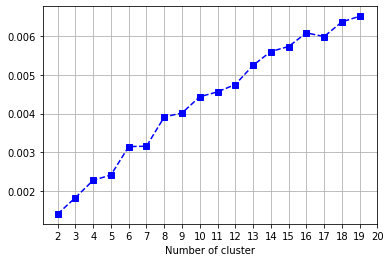

In [ ]:
plt.plot(sill,'bs--')
plt.xticks(list(range(0,19)),list(range(2,21)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

In [ ]:
model = KMeans(n_clusters=19, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=19, n_init=1)

In [ ]:
y_pred = model.predict(X)
centres = model.cluster_centers_
centres

array([[ 1.47942436e-03,  9.15198550e-04,  8.14291231e-04, ...,
         4.27578717e-04,  2.58287503e-04,  2.48821285e-04],
       [-3.90312782e-18,  9.92675198e-04, -7.58941521e-19, ...,
        -1.08420217e-18, -9.75781955e-19,  2.16840434e-19],
       [-3.90312782e-18,  6.50521303e-19, -7.58941521e-19, ...,
        -9.75781955e-19, -9.75781955e-19,  3.25260652e-19],
       ...,
       [-4.77048956e-18,  9.09900818e-04,  8.95711815e-04, ...,
        -1.51788304e-18, -1.13841228e-18,  8.67361738e-19],
       [-1.95156391e-18, -1.08420217e-18, -6.50521303e-19, ...,
        -4.33680869e-19, -4.87890978e-19, -1.08420217e-19],
       [ 5.86428000e-04,  1.64553153e-03,  1.19262239e-18, ...,
        -7.58941521e-19, -2.71050543e-19,  1.19262239e-18]])

In [ ]:
df['cluster'] = model.labels_

In [ ]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,14
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,0
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,8
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,8


In [ ]:
clusters = df.groupby('cluster')    

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidfmodel.get_feature_names()

for i in range(19):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 life
 world
 documentary
 love
 young
 takes
 three
 lives
 war
 stories
------------
Cluster 1:
 girl
 dreams
 meets
 killer
 school
 serial
 high
 true
 young
 love
------------
Cluster 2:
 wife
 death
 life
 son
 man
 murder
 mother
 husband
 ex
 family
------------
Cluster 3:
 man
 young
 life
 father
 family
 crime
 women
 brother
 friend
 find
------------
Cluster 4:
 woman
 young
 man
 husband
 life
 love
 falls
 father
 becomes
 must
------------
Cluster 5:
 find
 must
 team
 save
 friends
 three
 way
 secret
 world
 rescue
------------
Cluster 6:
 series
 documentary
 life
 stories
 animated
 reality
 follows
 based
 world
 comedy
------------
Cluster 7:
 town
 small
 new
 girl
 life
 family
 local
 teen
 must
 big
------------
Cluster 8:
 two
 group
 friends
 lives
 love
 women
 young
 teens
 fight
 brothers
------------
Cluster 9:
 old
 year
 life
 new
 11
 10
 school
 girl
 boy
 young
------------
Cluster 10:
 daughter
 mother
 son
 falls
 l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# silhouette score of my clusters
print("Silhouette Coefficient: %0.5f"%silhouette_score(X, model.labels_))

Silhouette Coefficient: 0.00610


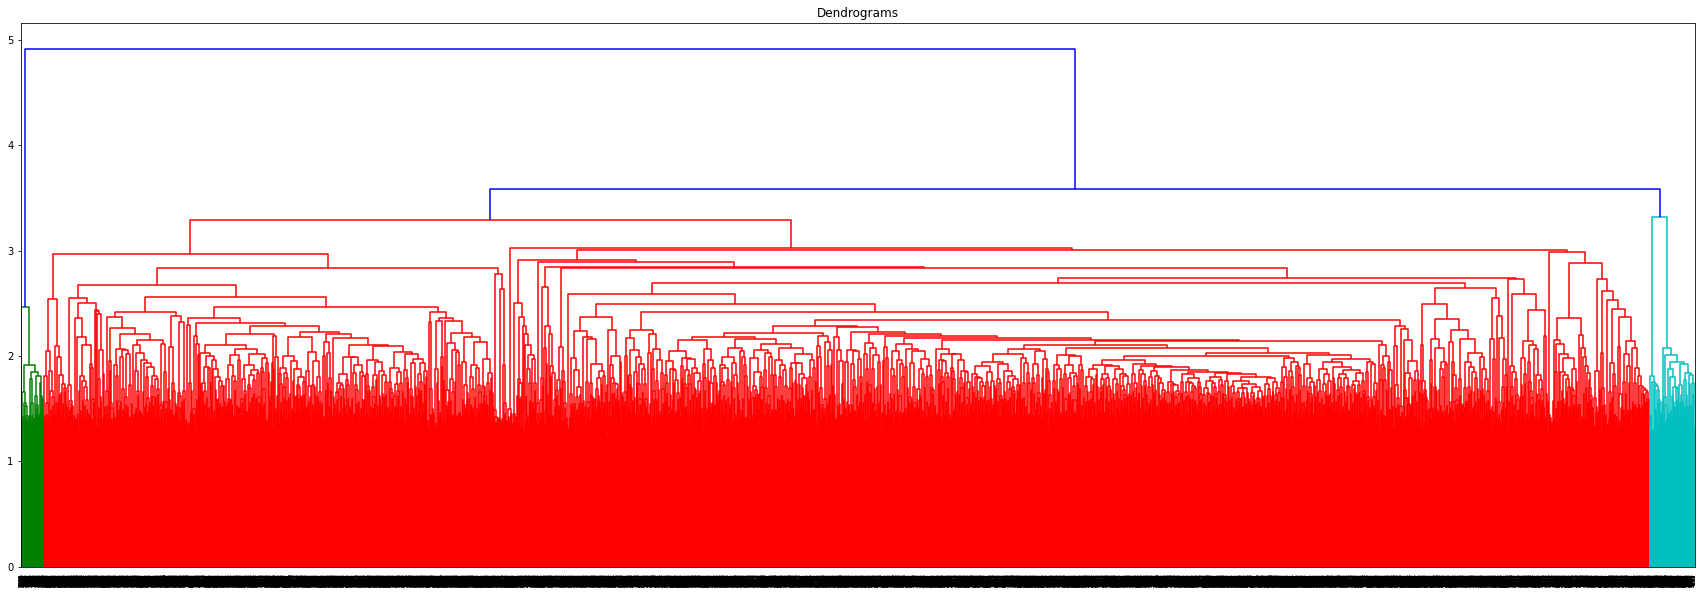

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.axhline(y=180)

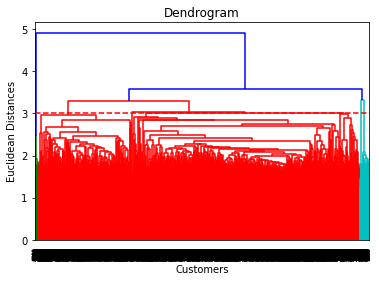

In [ ]:
dendrogram = shc.dendrogram(shc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=3, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line